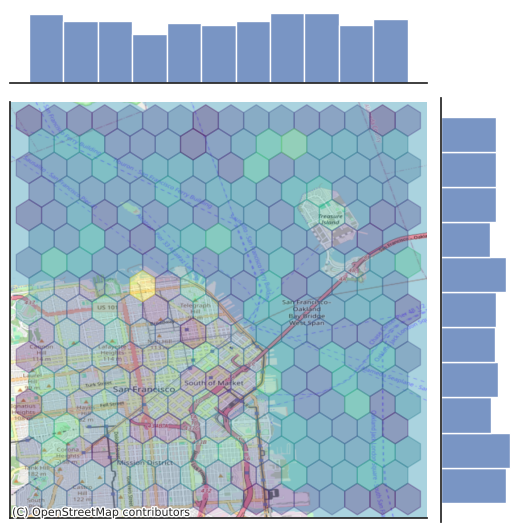

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np

# Generate a larger sample dataset
np.random.seed(42)
num_points = 1000
latitude = 37.75 + np.random.rand(num_points) * 0.1
longitude = -122.45 + np.random.rand(num_points) * 0.1

data = pd.DataFrame({
    'latitude': latitude,
    'longitude': longitude
})

# Convert to GeoDataFrame
geometry = [Point(xy) for xy in zip(data['longitude'], data['latitude'])]
gdf = gpd.GeoDataFrame(data, geometry=geometry, crs="EPSG:4326")

# Plot using seaborn jointplot
sns.set(style="white")
joint_kws = dict(gridsize=15, cmap="viridis", alpha=0.3)  # Increased gridsize for better resolution
g = sns.jointplot(x='longitude', y='latitude', data=data, kind="hex", **joint_kws)

# Convert the jointplot's axes to a GeoAxes
ax = g.ax_joint
gdf.plot(ax=ax, alpha=0)

# Add the OSM map background
ctx.add_basemap(ax, crs=gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

# Remove grid labels and ticks from the main plot
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_xticks([])
ax.set_yticks([])
ax.tick_params(left=False, bottom=False)

# Show the plot
plt.show()
